# Import

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
df = pd.read_csv('Data/heart_clean.csv')

# Analysis

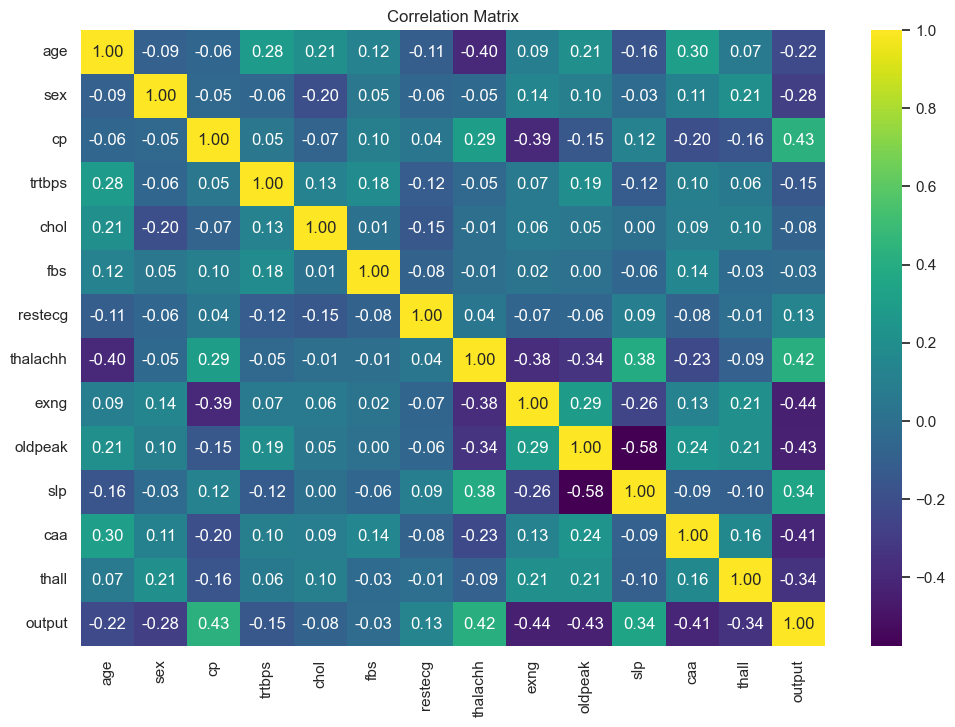

In [109]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

**Correlation**  
The correlation matrix shows several notable points:
- There is an inverse correlation between maximum heart rate (thalachh) and age
- The variable cp (chest pain type) showed a moderate positive correlation with the target variable (output), suggesting that chest pain type may be a predictor of heart disease.
- exng (exercise-induced angina) and oldpeak (exercise-induced vs. rest-induced ST depression) were moderately negatively correlated with the target variable.
- thalachh has a moderate negative correlation with exng and oldpeak.
- oldpeak has a significant negative correlation with slp (The slope of the peak exercise ST segment).
- Other variables show low to moderate correlations.

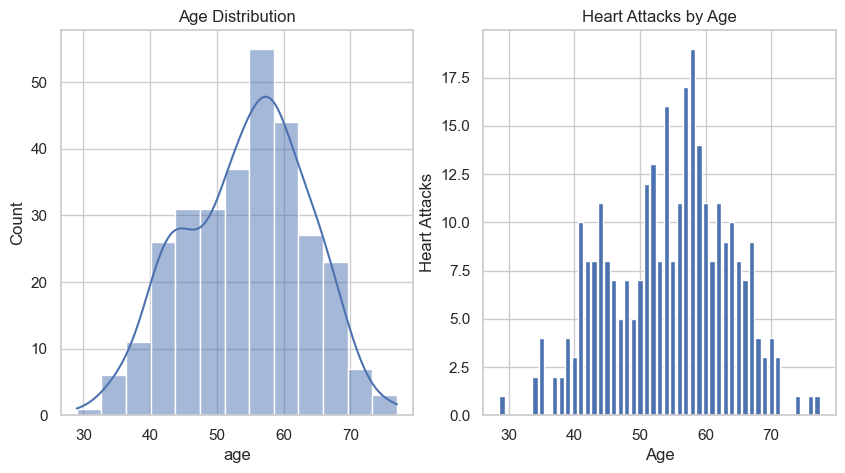

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

age_heart_attack_counts = df.groupby('age')['output'].count()
axes[1].bar(age_heart_attack_counts.index, age_heart_attack_counts.values)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Heart Attacks')
axes[1].set_title('Heart Attacks by Age')

plt.show()

**Age distribution:** The ages of individuals in the data set are distributed normally, concentrated around 50-60 years old.  

**Heart attack by age:**
1. Heart attack rates are highest in people in their mid to late 50s.
2. The second highest rate of heart attacks occurs in the 40s.
3. The rate of heart attacks occurring in young people (<30) is low.

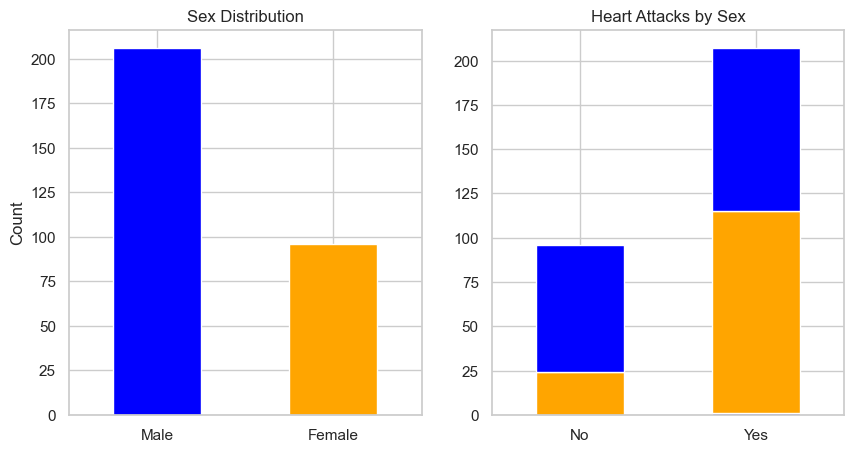

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Sex ratio in the dataset
sex = df['sex'].value_counts()
sex.plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Sex Distribution')
axes[0].set_xlabel('')
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(['Male', 'Female'], rotation=0)

# Analyzing the prevalence of heart disease in the dataset
sex_heart_attack_counts = df.groupby(['sex', 'output']).size().unstack().reset_index()
sex_heart_attack_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=axes[1])
axes[1].set_title('Heart Attacks by Sex')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].legend().set_visible(False)


# Corrected line
plt.show()